In [ ]:
# /home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_dataset.npz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import math
npz_file = '/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_dataset.npz'
data= np.load(npz_file, allow_pickle=True)
params = data["params"]
param_names= data["param_names"]

params_df = pd.DataFrame(params, columns=param_names)
params_df['r'] = params_df.apply(lambda row: math.sqrt(row['rec_x']**2 + row['rec_y']**2), axis=1)
print(params_df.head())


  label weight      R_ue     R_mean      Eage         trueE      recE  \
0    14      1    -1.592  34.523713  0.989169  92489.226562  2.045285   
1    14      1 -2.078725  25.116172   1.17434  92489.226562  2.045285   
2    14      1 -1.583037  42.536511  1.036896  92489.226562  1.961511   
3    14      1 -2.101132  32.887863   1.20727  92489.226562  1.937948   
4    14      1  -1.87596  31.167413  1.071793  92489.226562  1.841194   

        rec_x       rec_y rec_theta   rec_phi           r  
0  -48.137527  269.975006  0.348226  5.908468  274.232977  
1  -37.425072  185.477112  0.345953  5.887749  189.215208  
2 -498.354248  315.429657  0.343555  5.895855  589.790493  
3  406.171265  393.684906  0.352055  5.888737  565.652633  
4 -414.233002 -201.855453  0.348604  5.898174  460.797791  


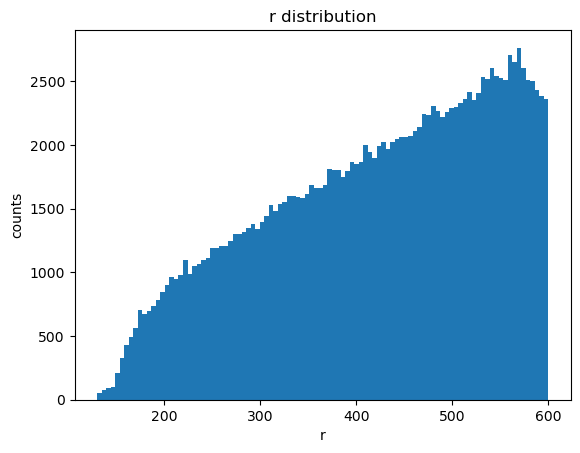

In [12]:
pcut={
    # 'theta': [10, 30],
    'r': [0, 100],
}
plt.hist(params_df['r'], bins=100)
plt.xlabel('r')
plt.ylabel('counts')
plt.title('r distribution')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot

import numpy as np
file = uproot.open("/home/zhonghua/Filt_Event/model_validation/exposure.root")
h1 = file["h1"]
h2 = file["h2"]
# 获取直方图的所有数据
values = h1.values()        # bin内容（纵坐标）
h2_values = h2.values()        # bin内容（纵坐标）
edges = h1.axis().edges()   # bin边界（横坐标）
h2_edges = h2.axis().edges()   # bin边界（横坐标）
centers = h1.axis().centers()  # bin中心
h2_centers = h2.axis().centers()  # bin中心

values = np.array(h1.values())
edges = np.array(h1.axis().edges())
centers = np.array(h1.axis().centers())
S=np.pi * 1000**2
parker=1e-15 * 1e4 
nums=[]
for i, theta in enumerate(centers):
    cosine_theta = np.cos(np.deg2rad(theta))
    area = S * cosine_theta
    exposure = values[i] * area
    num_i = exposure * parker
    nums.append(num_i)

weights=[num_i/251000/h2_values[i]/86400 for i, num_i in enumerate(nums)]
# weights=np.array(nums)/86400
print(np.sum(weights)*86400*365)


2046.9943484395983
